# Clustering

Visualizaciones:
- [Kmeans](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)
- [DBScan](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/)

PyCaret Clustering:
- [Ejemplo](https://nbviewer.org/github/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Clustering.ipynb)

Datasets:
- [Customers Data](https://www.kaggle.com/datasets/datascientistanna/customers-dataset)
- [Wine Data](https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering)
- [Credit Card Data](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata)
- [Mall Customer Segmentation](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)


Casos de Uso Reales:
- [Clustering Residential Electricity Consumption Data to Create Archetypes that Capture Household Behaviour in South Africa](https://arxiv.org/abs/2006.07197)

Notas:
- [Sobre las metricas](https://arxiv.org/abs/2212.12189)
- [Sobre la escala](https://stats.stackexchange.com/questions/89809/is-it-important-to-scale-data-before-clustering)


In [24]:
!pip install ucimlrepo -U -q

In [25]:
import warnings
warnings.filterwarnings("ignore")

In [55]:
import json
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
  
# metadata 
print(json.dumps(wine.metadata, indent=4)) 

{
    "uci_id": 109,
    "name": "Wine",
    "repository_url": "https://archive.ics.uci.edu/dataset/109/wine",
    "data_url": "https://archive.ics.uci.edu/static/public/109/data.csv",
    "abstract": "Using chemical analysis to determine the origin of wines",
    "area": "Physics and Chemistry",
    "tasks": [
        "Classification"
    ],
    "characteristics": [
        "Tabular"
    ],
    "num_instances": 178,
    "num_features": 13,
    "feature_types": [
        "Integer",
        "Real"
    ],
    "demographics": [],
    "target_col": [
        "class"
    ],
    "index_col": null,
    "has_missing_values": "no",
    "missing_values_symbol": null,
    "year_of_dataset_creation": 1992,
    "last_updated": "Mon Aug 28 2023",
    "dataset_doi": "10.24432/C5PC7J",
    "creators": [
        "Stefan Aeberhard",
        "M. Forina"
    ],
    "intro_paper": {
        "title": "Comparative analysis of statistical pattern recognition methods in high dimensional settings",
        "aut

In [27]:
# variable information 
wine.variables

,name,role,type,demographic,description,units,missing_values
0,class,Target,Categorical,None,None,None,no
1,Alcohol,Feature,Continuous,None,None,None,no
2,Malicacid,Feature,Continuous,None,None,None,no
3,Ash,Feature,Continuous,None,None,None,no
4,Alcalinity_of_ash,Feature,Continuous,None,None,None,no
5,Magnesium,Feature,Integer,None,None,None,no
6,Total_phenols,Feature,Continuous,None,None,None,no
7,Flavanoids,Feature,Continuous,None,None,None,no
8,Nonflavanoid_phenols,Feature,Continuous,None,None,None,no
9,Proanthocyanins,Feature,Continuous,None,None,None,no


In [28]:
X

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = X.columns

# Apply scaler to selected columns and replace them in the DataFrame
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

X.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [30]:
import pandas as pd
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2']) 
X.head()

,PC1,PC2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


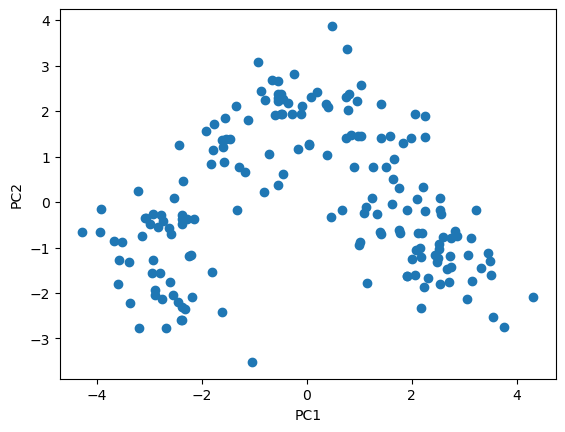

In [53]:
import matplotlib.pyplot as plt

plt.scatter(X['PC1'], X['PC2'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

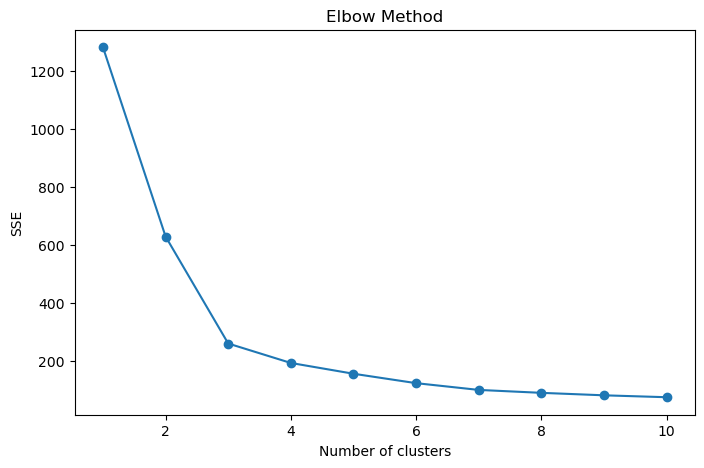

In [32]:
from sklearn.cluster import KMeans

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

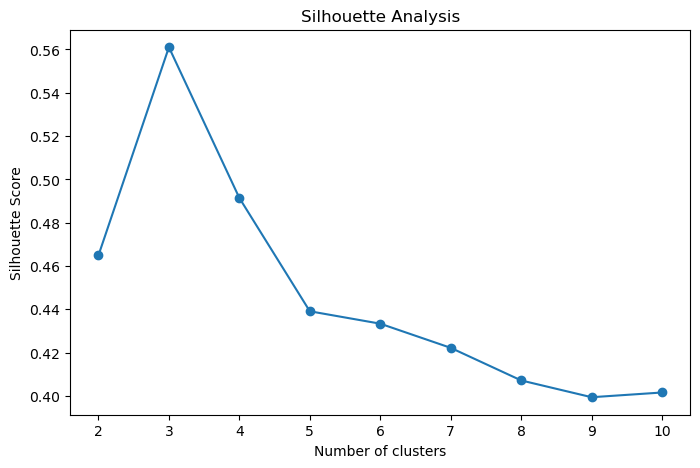

In [33]:
from sklearn.metrics import silhouette_score

# Silhouette analysis
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

In [35]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

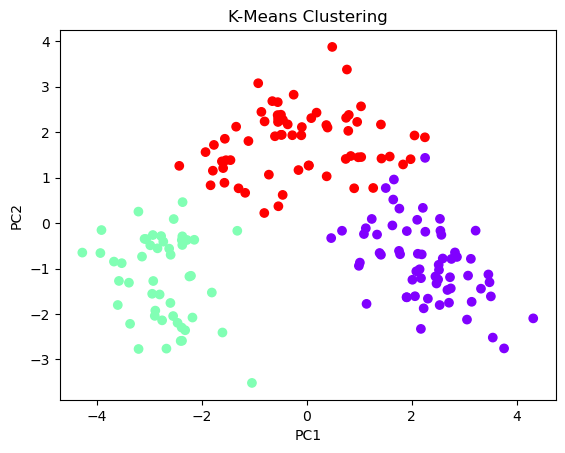

In [36]:
plt.scatter(X['PC1'], X['PC2'], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering')
plt.show()

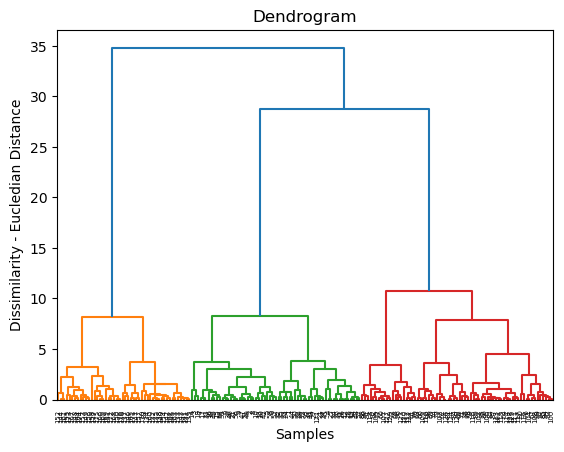

In [38]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Dissimilarity - Eucledian Distance')
plt.show()

In [39]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit(X)

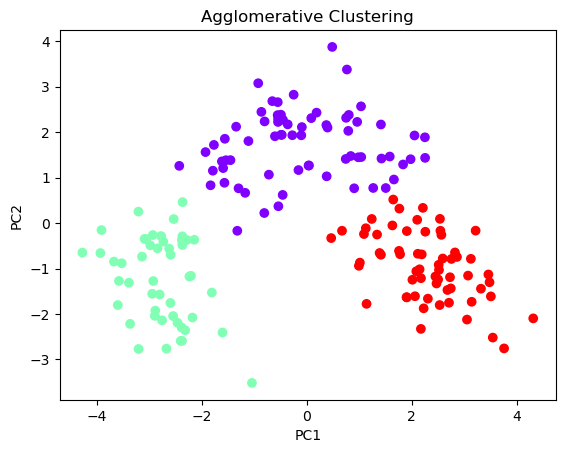

In [41]:
plt.scatter(X['PC1'], X['PC2'], c = hc.labels_, cmap ='rainbow')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"Agglomerative Clustering")
plt.show()

In [42]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.7, min_samples=10).fit(X)

In [43]:
db_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)  #label=-1 for noise
db_noise = list(db.labels_).count(-1)

print(f"Estimated number of clusters: {db_clusters}")
print(f"Estimated number of noise points: {db_noise}")

Estimated number of clusters: 4
Estimated number of noise points: 20


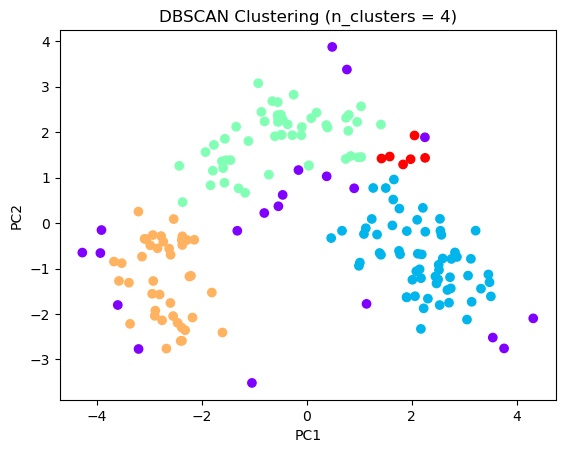

In [44]:
plt.scatter(X['PC1'], X['PC2'], c = db.labels_, cmap ='rainbow')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"DBSCAN Clustering (n_clusters = {db_clusters})")
plt.show()

# Original labels

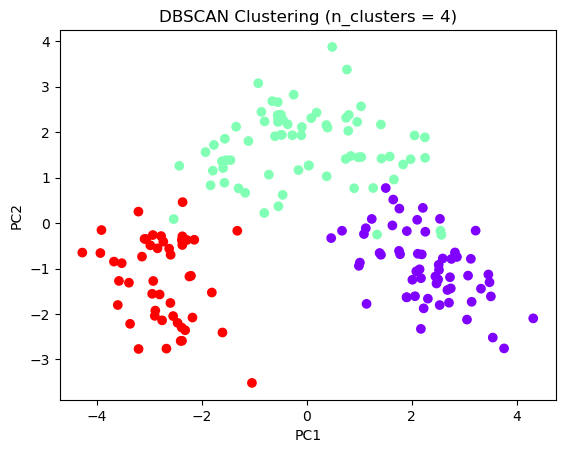

In [51]:
plt.scatter(X['PC1'], X['PC2'], c = y.iloc[:,0].to_numpy(), cmap ='rainbow')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"DBSCAN Clustering (n_clusters = {db_clusters})")
plt.show()

### Para 3D
```python
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
fig.add_axes(ax)

sc = ax.scatter(X['PC1'], X['PC2'], X['PC3'], c = y.iloc[:,0].to_numpy(), cmap ='rainbow')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3');
plt.show()
```